In [32]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("user_influencer_pairs.csv")

In [3]:
df.head()

,followId,FollowerId,InfluencerId
0,11,87E2923A-FD01-43AC-8369-864081916F83,8E665D3B-F5CD-48D2-8103-4B74B79A405F
1,20,371088ec-ccd9-4c1e-acb3-6c3b43c84627,f7e6dd70-1b33-4d36-916b-c31e655555b5
2,21,24f13669-d3c4-431b-ae72-7c445aec412c,f7e6dd70-1b33-4d36-916b-c31e655555b5
3,22,a328005f-1ca5-4c79-961f-4eab118a32ab,b0871e46-0322-4934-9b04-49dcf3ce3130
4,23,a328005f-1ca5-4c79-961f-4eab118a32ab,bce93b7e-f594-4117-a354-1051f10fd56c


In [5]:
df[df['FollowerId']==df['InfluencerId']].head().reset_index().drop(columns=["followId"])

,index,FollowerId,InfluencerId
0,16,cb62b2ec-feb4-41e8-a82c-511f7f068acc,cb62b2ec-feb4-41e8-a82c-511f7f068acc
1,17,47dc074b-c445-4cab-b2e2-fdeff0ca852e,47dc074b-c445-4cab-b2e2-fdeff0ca852e
2,18,f0a80b4a-ab7f-44a1-9528-d0acb6708f58,f0a80b4a-ab7f-44a1-9528-d0acb6708f58
3,19,a726ee53-0c95-4659-b2c7-82d14fc5cb77,a726ee53-0c95-4659-b2c7-82d14fc5cb77
4,23,c0af29d2-85da-4d15-9ccf-7a80c86d6bb9,c0af29d2-85da-4d15-9ccf-7a80c86d6bb9


In [6]:
df = df[df['FollowerId']!=df['InfluencerId']]
df.index = np.arange(0, len(df))

In [8]:
df['FollowerId'] = df['FollowerId'].astype('category').cat.codes
df['InfluencerId'] = df['InfluencerId'].astype('category').cat.codes

In [9]:
df.head()

,followId,FollowerId,InfluencerId
0,11,972,870
1,20,408,1553
2,21,275,1553
3,22,1163,1097
4,23,1163,1179


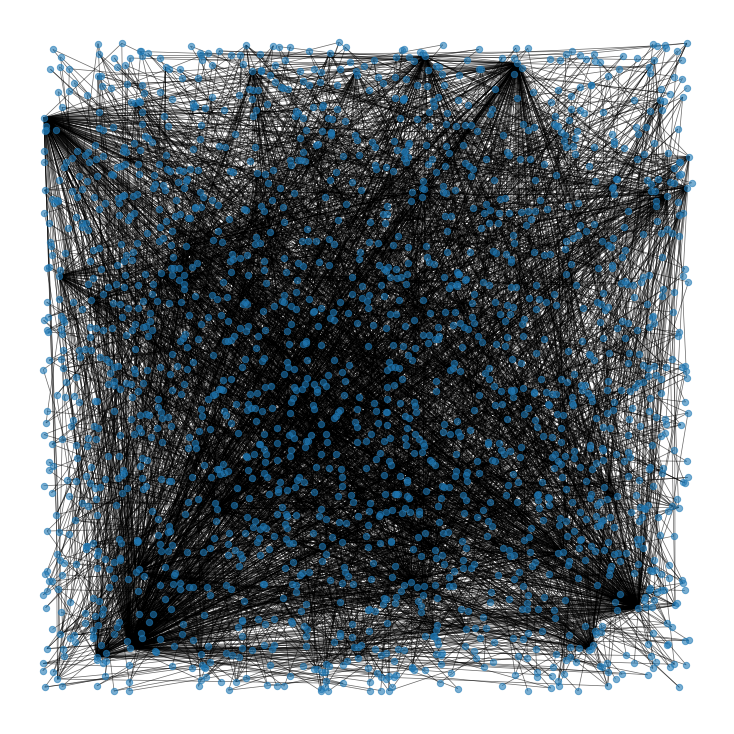

In [10]:
G = nx.from_pandas_edgelist(df, 'FollowerId', "InfluencerId", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [11]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components : %d" % nx.number_connected_components(G))

Number of nodes : 1877
Number of edges : 4154
Number of connected components : 1


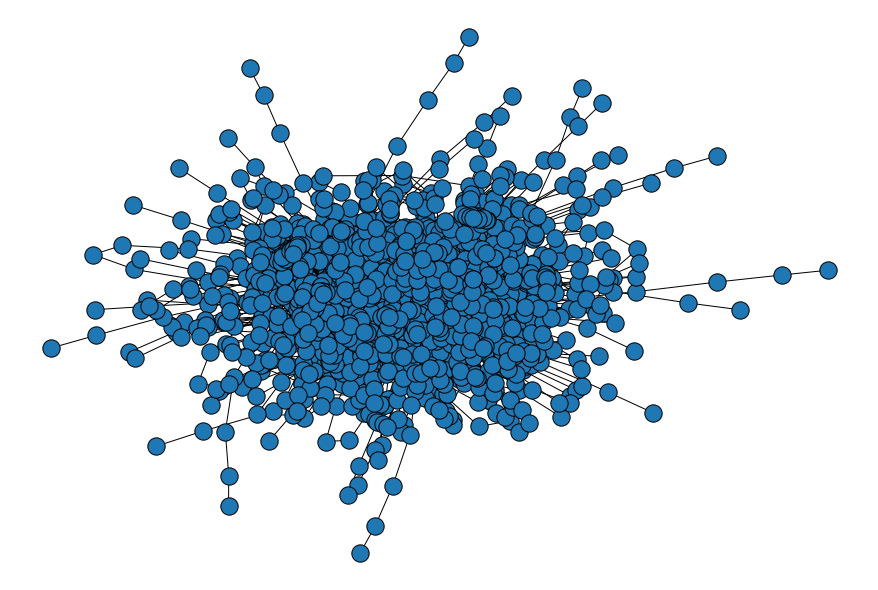

In [12]:
#plot the graph
plt.figure(figsize=(12,8))
nx.draw(G)
plt.gca().collections[0].set_edgecolor("#000000")

In [14]:
# Remove 20% of the edges
proportion_edges = 0.2
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# Create a copy of the graph and remove the edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

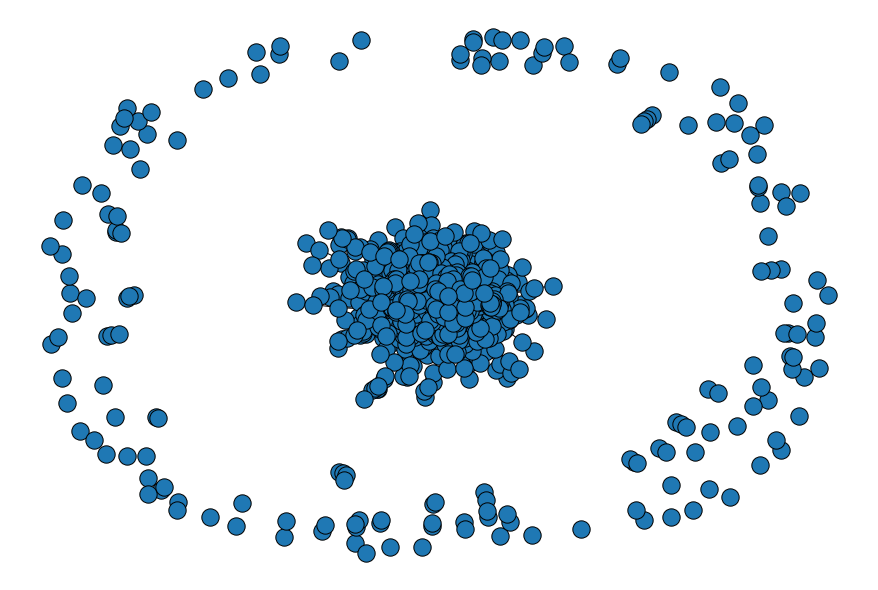

In [15]:
# plotting the partially observed graph
plt.figure(figsize=(12,8))
nx.draw(G_train)
plt.gca().collections[0].set_edgecolor("#000000")

In [16]:
# print out the number of edges we deleted and the number of edges remaining
edge_subset_size = len(list(edge_subset))
print("Number of edges deleted : %d" % edge_subset_size)
print("Number of edges remaining : %d" % (m - edge_subset_size))

Number of edges deleted : 830
Number of edges remaining : 3324


In [17]:
# making prediction using jaccard coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

In [18]:
pred_jaccard #the prediction consists of the first node, the second node, and a jaccard score

[(0, 1, 0.0),
 (0, 2, 0.0),
 (0, 3, 0.10526315789473684),
 (0, 4, 0.0),
 (0, 5, 0.0),
 (0, 6, 0.0),
 (0, 7, 0.0),
 (0, 8, 0.0),
 (0, 9, 0.06666666666666667),
 (0, 10, 0.0),
 (0, 11, 0.0),
 (0, 12, 0.0),
 (0, 13, 0.0),
 (0, 14, 0.0),
 (0, 15, 0.0),
 (0, 16, 0.06666666666666667),
 (0, 17, 0.0),
 (0, 18, 0.0),
 (0, 19, 0.0),
 (0, 20, 0.0),
 (0, 21, 0.0),
 (0, 22, 0.0),
 (0, 23, 0.0),
 (0, 24, 0.0),
 (0, 25, 0.0),
 (0, 26, 0.0),
 (0, 27, 0.0),
 (0, 28, 0.0),
 (0, 29, 0.0),
 (0, 30, 0.0),
 (0, 31, 0.0),
 (0, 32, 0.11764705882352941),
 (0, 33, 0.0),
 (0, 34, 0.0),
 (0, 35, 0.13333333333333333),
 (0, 36, 0.0),
 (0, 37, 0.0),
 (0, 38, 0.0),
 (0, 39, 0.0),
 (0, 40, 0.0),
 (0, 41, 0.0),
 (0, 42, 0.0),
 (0, 43, 0.0),
 (0, 44, 0.0),
 (0, 45, 0.0),
 (0, 46, 0.0),
 (0, 47, 0.0),
 (0, 48, 0.0),
 (0, 49, 0.0),
 (0, 50, 0.0),
 (0, 51, 0.0),
 (0, 52, 0.0),
 (0, 53, 0.0),
 (0, 54, 0.06666666666666667),
 (0, 55, 0.0),
 (0, 56, 0.0),
 (0, 57, 0.0),
 (0, 58, 0.0),
 (0, 59, 0.0),
 (0, 60, 0.0),
 (0, 61, 0.04

In [25]:
# Compute the ROC AUC Score for jaccard
from sklearn import metrics
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
auc_jaccard

0.5839075342256096

In [28]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

# Compute the ROC AUC Score
auc_adamic = roc_auc_score(label_adamic, score_adamic)
auc_adamic

0.5938113475435349

In [30]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

# compute the ROC AUC Score
auc_pref = roc_auc_score(label_pref, score_pref)
auc_pref

0.6922285328085137

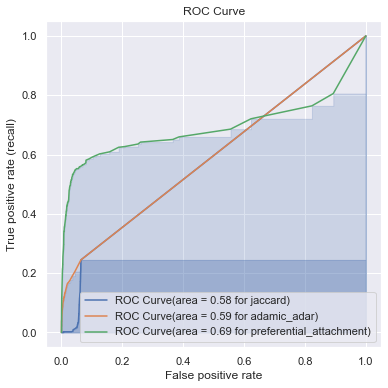

In [38]:
def roc_curve(label, score, method):
    fpr, tpr, _ = metrics.roc_curve(label, score)
    roc_auc = metrics.roc_auc_score(label, score)

    sns.mpl.pyplot.fill_between(fpr, tpr, step='post', alpha=0.2,color='b')
    sns.lineplot(x=fpr, y=tpr, linestyle='--', label='ROC Curve(area = %0.2f for {})'.format(method) % roc_auc)
    
    sns.mpl.pyplot.xlabel('False positive rate')
    sns.mpl.pyplot.ylabel('True positive rate (recall)')
    sns.mpl.pyplot.title('ROC Curve')

roc_curve(label_jaccard, score_jaccard, "jaccard")
roc_curve(label_adamic, score_adamic, "adamic_adar")
roc_curve(label_pref, score_pref, "preferential_attachment")